# ЛР3 Кокозов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('results.csv')

In [3]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data.shape

(42105, 9)

In [5]:
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [7]:
data = data.fillna(0)

In [8]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
data.drop(['date','home_team','away_team','tournament','city','country'], axis = 1, inplace = True)

In [11]:
data.isnull().sum()

home_score    0
away_score    0
neutral       0
dtype: int64

In [12]:
parts = np.split(data, [2,3], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

   home_score away_score
0          0          0
1          4          2
2          2          1
3          2          2
4          3          0 

Выходные данные:

   neutral
0   False
1   False
2   False
3   False
4   False


## Разделение выборки

In [13]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.05)

In [14]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       home_score away_score
3421           2          2
7473           1          0
4041           5          3
21495          1          1
12416          3          1 

Входные параметры тестовой выборки:

       home_score away_score
13558          1          1
21269          0          0
1393           3          2
2636           2          1
16553          0          1 

Выходные параметры обучающей выборки:

       neutral
3421    False
7473     True
4041    False
21495   False
12416   False 

Выходные параметры тестовой выборки:

       neutral
13558   False
21269   False
1393    False
2636    False
16553   False


In [15]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(39999, 2)
(2106, 2)
(39999, 1)
(2106, 1)


## Модель ближайших соседей для произвольного гиперпараметра K

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [18]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.5]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [20]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 0.4024216524216524
Средняя абсолютная ошибка для 5 ближайших соседей: 0.3789173789173789
Средняя абсолютная ошибка для 10 ближайших соседей: 0.36566951566951567


In [21]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 0.262701804368471
Средняя квадратичная ошибка для 5 ближайших соседей: 0.22514719848053186
Средняя квадратичная ошибка для 10 ближайших соседей: 0.20518993352326687


In [22]:
# Оценка коэффициента детерминации
print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN))

Коэффициент детерминации для 2 ближайших соседей: -0.37449686677173677
Коэффициент детерминации для 5 ближайших соседей: -0.1780053038382048
Коэффициент детерминации для 10 ближайших соседей: -0.07358577684242307


In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

In [24]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [25]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=100)

Лучшее число ближайших соседей:

 {'n_neighbors': 100}

Лучшее значение средней квадратичной ошибки:

 -0.18486346601712927


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



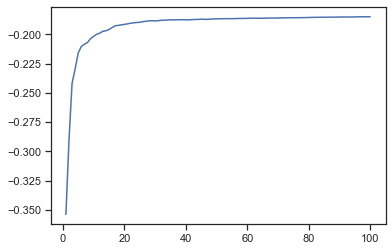

In [27]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

Лучшая модель:

 KNeighborsRegressor(n_neighbors=100)

Лучшее число ближайших соседей:

 {'n_neighbors': 100}

Лучшее значение коэффициента детерминации:

 0.001666477462120608

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



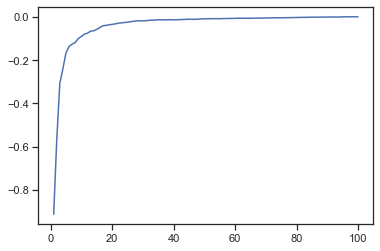

In [28]:

gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кроссвалидация

In [29]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [-0.18850698 -0.08349931 -0.08975029 -0.10182909 -0.15106992] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: -0.4556502126273679 

- 5 ближайших соседей: -0.22999172497257464 

- 10 ближайших соседей: -0.12293111685100802 

- 50 ближайших соседей: -0.04612392475452483 

- 100 ближайших соседей: -0.027000288601775148 

